### 1. Importamos librerías

In [1]:
#Importamos las librerías clásicas 

import pandas as pd 
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from math import pi
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler
from scipy import stats 
import warnings 
import os
import statsmodels.api as sm


### 2. Leamos el conjunto de datos en formato CSV y XLSX

In [2]:
#Leamos el conjunto de datos en formato CSV

df = pd.read_csv('Iris.csv')
df


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Leamos el conjunto de datos en formato xlsx

df_xlsx = pd.read_excel('Iris.xlsx')
df_xlsx


,"Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species"
0,"1,5.1,3.5,1.4,0.2,Iris-setosa"
1,"2,4.9,3.0,1.4,0.2,Iris-setosa"
2,"3,4.7,3.2,1.3,0.2,Iris-setosa"
3,"4,4.6,3.1,1.5,0.2,Iris-setosa"
4,"5,5.0,3.6,1.4,0.2,Iris-setosa"
...,...
145,"146,6.7,3.0,5.2,2.3,Iris-virginica"
146,"147,6.3,2.5,5.0,1.9,Iris-virginica"
147,"148,6.5,3.0,5.2,2.0,Iris-virginica"
148,"149,6.2,3.4,5.4,2.3,Iris-virginica"


In [4]:
df_xlsx.columns


Index(['Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species'], dtype='object')

In [5]:
#Quitaremos las comas, comillas y ordenaremos las columnas.

frames = []
for i in range(150):
    order = (df_xlsx['Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species'][i]).split(',')
    frame = []
    frame.append(float(order[0]))
    frame.append(float(order[1]))
    frame.append(float(order[2]))
    frame.append(float(order[3]))
    frame.append(float(order[4]))
    frame.append(str(order[5]))
    frames.append(frame)

df_xlsx = pd.DataFrame(frames, columns = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_xlsx 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146.0,6.7,3.0,5.2,2.3,Iris-virginica
146,147.0,6.3,2.5,5.0,1.9,Iris-virginica
147,148.0,6.5,3.0,5.2,2.0,Iris-virginica
148,149.0,6.2,3.4,5.4,2.3,Iris-virginica


Podemos trabajar con cualquier DF, ya sea df o df_xlsx. Para que sean iguales, debemos borrar la columna 'Id' de df_xlsx, entonces debemos correr la siguiente línea de código.

In [6]:
#df_xlsx = df_xlsx.drop(columns = ['Id'])
#df_xlsx


### 3. Información básica del conjunto de datos

In [7]:
df.describe()


,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veamos si hay valores pérdidos 

Los valores perdidos pueden producirse cuando no se proporciona información para uno o más elementos o para una unidad completa.

In [9]:
df.isnull().sum()


sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

Veamos si hay datos duplicados

El método drop_duplicates() de Pandas ayuda a eliminar los duplicados

In [10]:
data = df.drop_duplicates(subset = 'class',)
data


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


Podemos ver que sólo hay tres especies únicas.Veamos si el conjunto de datos está equilibrado o no

In [11]:
df.value_counts('class')


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### 4. Análisis exploratorio

### 4.1 Visualización

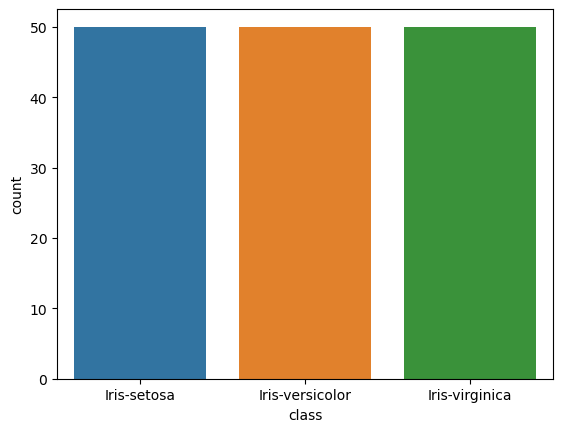

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df, )
plt.show()


Relacionemos las variables

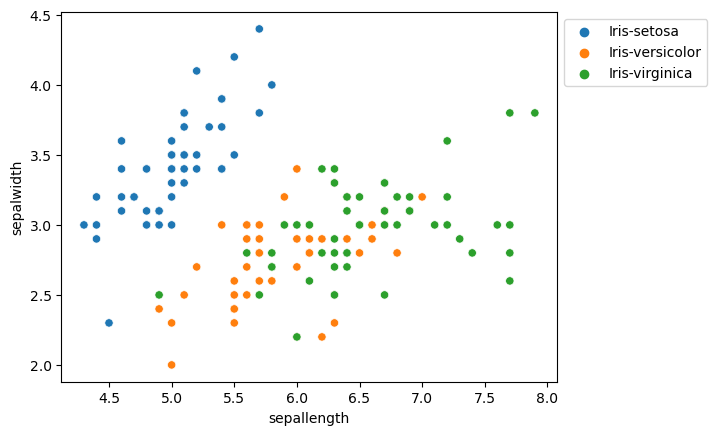

In [13]:
#sepallength vs sepalwidth

sns.scatterplot(x='sepallength', y='sepalwidth',
                hue='class', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


De la última figura vemos que:

1. La especie Setosa tiene sépalos de menor longitud pero de mayor anchura.
2. La especie Versicolor se encuentra en el medio de las otras dos especies en términos de longitud y anchura de los sépalos.
3. La especie Virginica tiene sépalos más largos pero menos anchos.

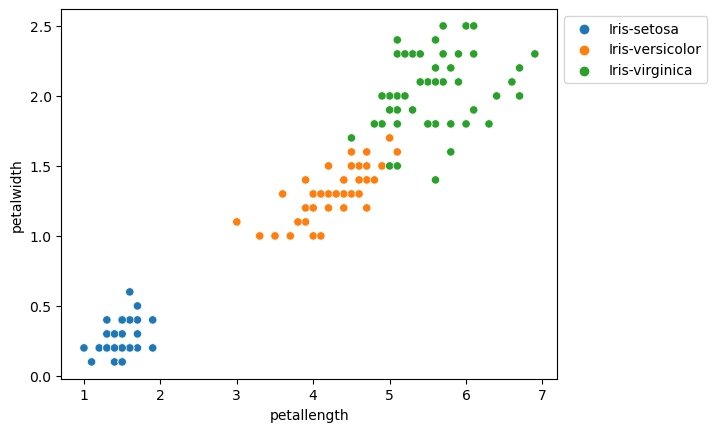

In [14]:
#petallength vs petalwidth

sns.scatterplot(x='petallength', y='petalwidth',
                hue='class', data=df, )
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()


De la última figura vemos que:

1. La especie Setosa tiene pétalos de menor longitud y anchura.
2. La especie Versicolor se encuentra en el medio de las otras dos especies en términos de longitud y anchura de los pétalos.
3. La especie Virginica tiene la mayor longitud y anchura de pétalo.

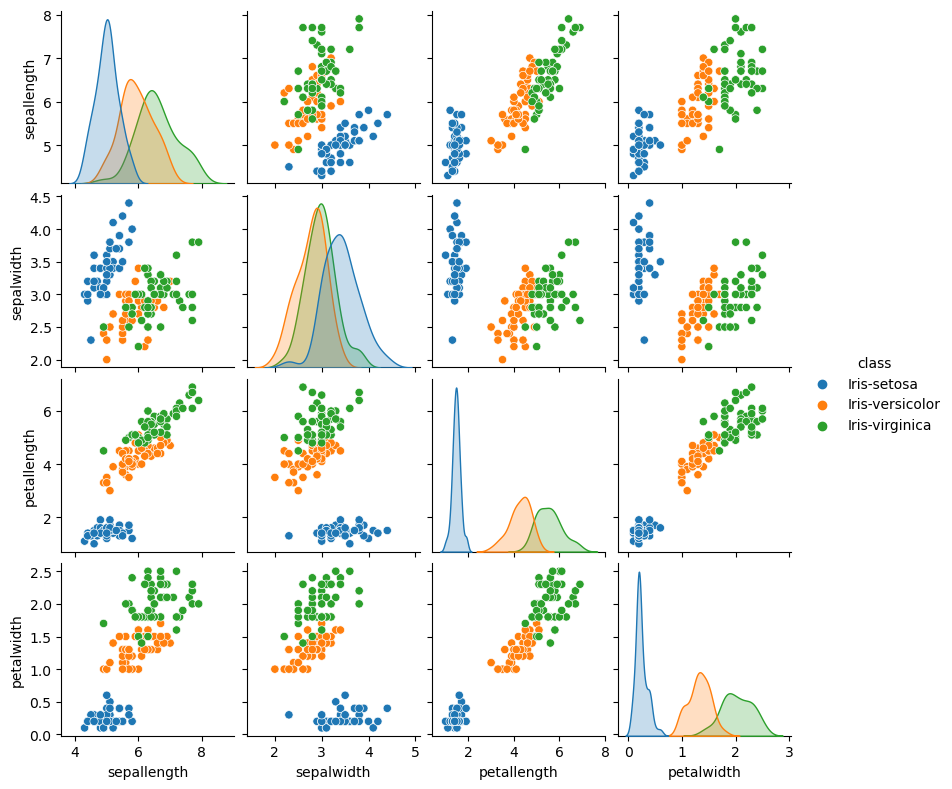

In [15]:
#Vamos a trazar todas las relaciones de las columnas utilizando un pairplot.

#Para hacerlo con df_xlsx hay que eliminar la columna "Id" (o eliminarla de
#antes)

#sns.pairplot(df_xlsx.drop(['Id'], axis = 1), hue='Species', height=2)

sns.pairplot(df, hue='class', height=2)


Podemos ver muchos tipos de relaciones en este gráfico, como que la especie Setosa tiene la menor anchura y longitud de pétalos. También tiene los sépalos de menor longitud, pero de mayor anchura. 

### 4.2 Histogramas

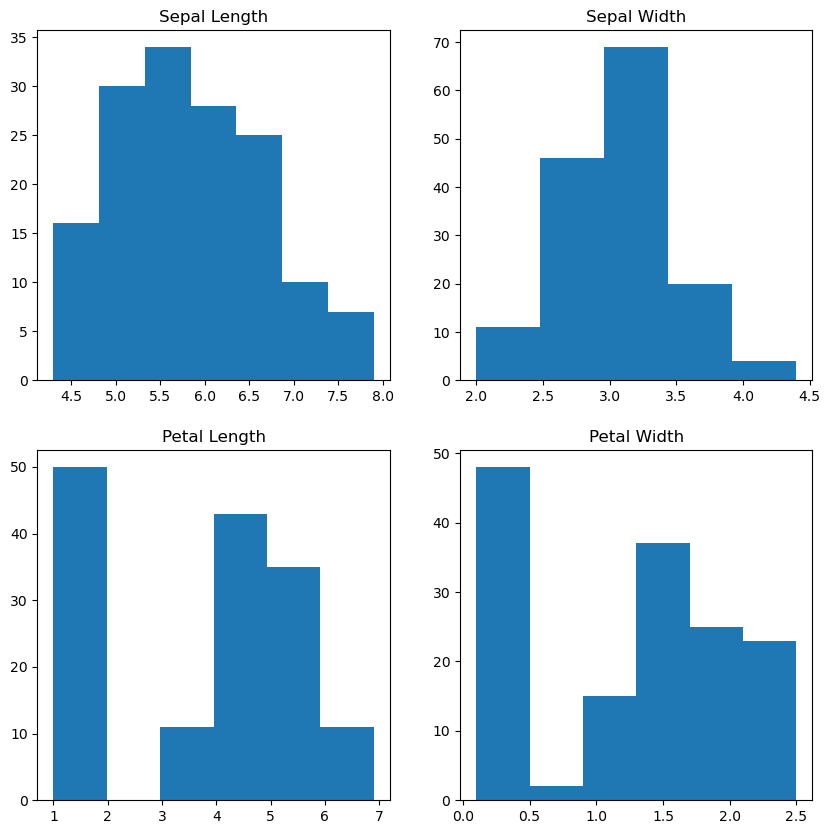

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepallength'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepalwidth'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petallength'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petalwidth'], bins=6);


Del gráfico anterior, podemos ver que 

1. La mayor frecuencia de longitud de los sépalos se sitúa entre 30 y 35, es decir, entre 5,5 y 6.
2. La mayor frecuencia de la anchura de los sépalos se sitúa en torno a 70, es decir, entre 3,0 y 3,5.
3. La mayor frecuencia de longitud de los pétalos se sitúa en torno a 50, es decir, entre 1 y 2.
4. La frecuencia más alta de la anchura de los pétalos está entre 40 y 50, es decir, entre 0,0 y 0,5.

C:\Users\fabia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fabia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fabia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

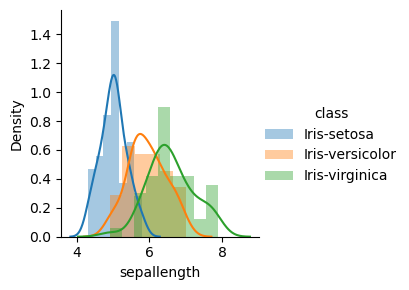

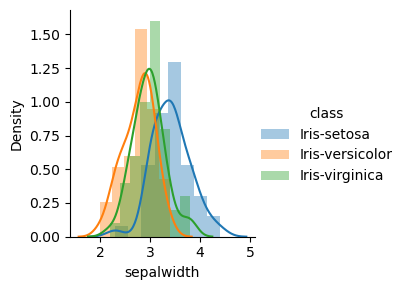

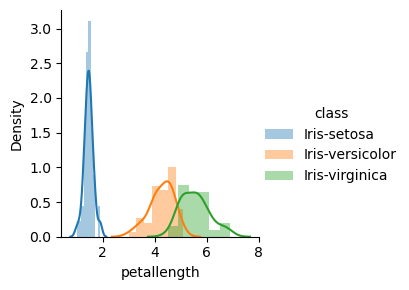

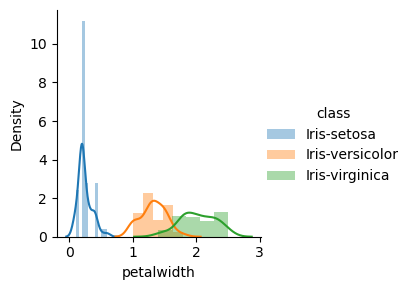

In [17]:
plot = sns.FacetGrid(df, hue='class')
plot.map(sns.distplot, 'sepallength').add_legend()
 
plot = sns.FacetGrid(df, hue='class')
plot.map(sns.distplot, 'sepalwidth').add_legend()
 
plot = sns.FacetGrid(df, hue='class')
plot.map(sns.distplot, 'petallength').add_legend()
 
plot = sns.FacetGrid(df, hue='class')
plot.map(sns.distplot, 'petalwidth').add_legend()
 
plt.show()


De los gráficos anteriores, podemos ver que:

1. En el caso de la longitud del sépalo, hay una gran cantidad de superposición.
2. En el caso de la anchura del sépalo, también hay una gran cantidad de superposición.
3. En el caso de la longitud de los pétalos, hay muy poca superposición.
4. En el caso de la anchura de los pétalos, también hay muy poca superposición.

### 4.3 Correlaciones

Pandas dataframe.corr() se utiliza para encontrar la correlación por pares de todas las columnas en el marco de datos. Cualquier valor NA se excluye automáticamente. Para cualquier columna de tipo de datos no numérico en el DataFrame se ignora.

In [18]:
df.corr(method='pearson')


,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


### 4.4 Mapa de calor 

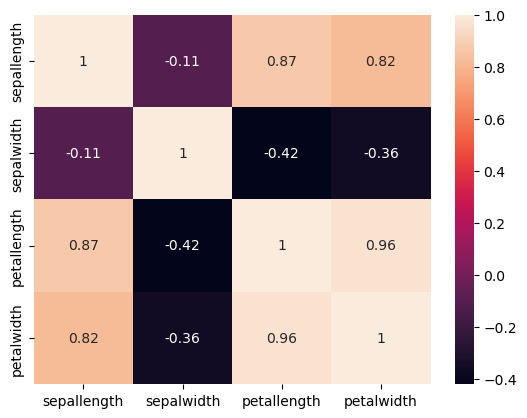

In [19]:
sns.heatmap(df.corr(method='pearson'), annot = True);
 
plt.show()


Del gráfico anterior, podemos ver que:

1. La anchura de los pétalos y la longitud de los pétalos tienen correlaciones altas. Si el valor de la longitud del pétalo aumenta, la anchura del pétalo también aumenta.
2. La anchura de los pétalos y la longitud de los sépalos tienen buenas correlaciones.
3. La longitud del sépalo tiene una alta correlación positiva con la longitud y la anchura de los pétalos.
4. La anchura del sépalo tiene una correlación negativa con la longitud y la anchura de los pétalos.


### 4.5 Gráficos de caja 

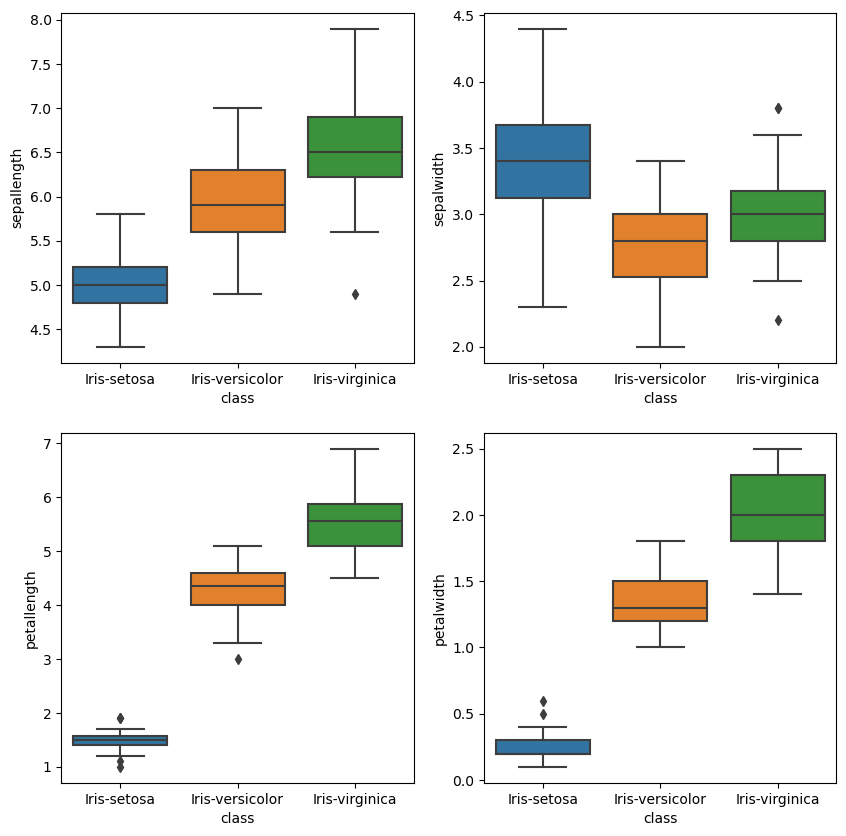

In [20]:
def graph(y):
    sns.boxplot(x='class', y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# Añadimos a la posición específica

plt.subplot(221)
graph('sepallength')
 
plt.subplot(222)
graph('sepalwidth')
 
plt.subplot(223)
graph('petallength')
 
plt.subplot(224)
graph('petalwidth')
 
plt.show()


Del gráfico anterior, podemos ver que - 

1. La especie Setosa tiene las características más pequeñas y menos distribuidas con algunos valores atípicos.
2. La especie Versicolor tiene las características medias.
3. La especie Virginica tiene las características más altas

### 5. Valores atípicos

Un valor atípico es un elemento/objeto de datos que se desvía significativamente del resto de los objetos (denominados normales). Pueden deberse a errores de medición o de ejecución. 

<AxesSubplot:xlabel='sepalwidth'>

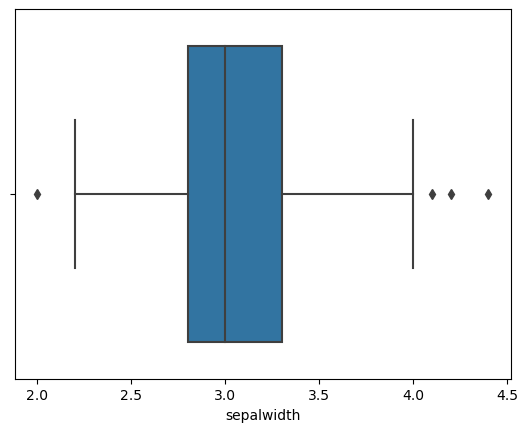

In [21]:
#Consideremos el conjunto de datos del iris y tracemos el boxplot para la 
#columna sepalwidth.

sns.boxplot(x='sepalwidth', data=df)


En el gráfico anterior, los valores superiores a 4 e inferiores a 2 actúan como valores atípicos.

Para eliminar el valor atípico, se debe seguir el mismo proceso de eliminación de una entrada del conjunto de datos utilizando su posición exacta en el conjunto de datos, ya que en todos los métodos anteriores de detección de valores atípicos el resultado final es la lista de todos los elementos de datos que satisfacen la definición de valor atípico según el método utilizado.

Detectaremos los valores atípicos mediante IQR (Intervalo intercuartílico) y los eliminaremos. También dibujaremos el diagrama de caja para ver si los valores atípicos se han eliminado o no.

Old Shape:  (150, 5)
New Shape:  (146, 5)


<AxesSubplot:xlabel='sepalwidth'>

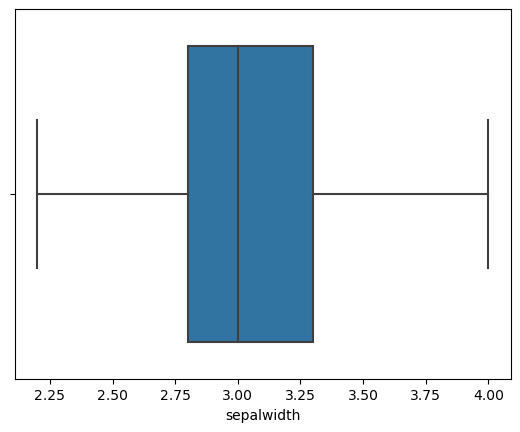

In [22]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
 
#Cargamos nuevamente el conjunto de datos
df = pd.read_csv('Iris.csv')
 
# IQR
Q1 = np.percentile(df['sepalwidth'], 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(df['sepalwidth'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['sepalwidth'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(df['sepalwidth'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)
 
sns.boxplot(x='sepalwidth', data=df)


### 6. Otra forma de cargar el data de iris

In [23]:
datairis = sns.load_dataset('iris')
df_iris = pd.DataFrame(datairis)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
